<a href="https://colab.research.google.com/github/AlexMa123/BIU_Computational_physics_2023/blob/main/Lecture2%20-%20fractal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fractal

## Review

### Why do we need fractals?
Euclidian geometry cannot describe complex structures in nature, since it deals only with simple shapes and forms such as straight lines, triangles, circles and so on. However, nature doesn't have such simple structures. 

|![example of fractals](https://www.researchgate.net/publication/340926663/figure/fig1/AS:941847388110856@1601565324876/Examples-of-fractal-a-Examples-of-mathematical-fractals-Bovill-1996-b-Examples-of.png)|
|:-:|
|*Fig1.1: a) Examples of mathematical (deterministic) fractals: Koch curve, Sierpinski triangle, dragon curve; b) Fractal in nature*|

### What is a fractal ?
A fractal is an object or quantity that displays `self-similarity`, in a somewhat technical sense, on all scales. The object needs not to exhibit exactly the same structure at all scales, but `the same "type" of structures must appear on all scales`. A plot of the quantity on a log-log graph versus scale then yields a straight line, whose slope is said to be the fractal dimension. The prototypical example for a fractal is the length of a coastline measured with rulers of different lengths.

### Self-similarity and scale invariance

The most important property of fractals is their [self-similarity](https://en.wikipedia.org/wiki/Self-similarity). Self-similarity means the object looks "roughly" the same on any scale. Note the main difference between regular Euclidean space and fractal geometry: whereas regular space is symmetric under translation, in fractals this symmetry is violated. Instead, fractals possess a new symmetry, called scale invarience.

|![Self-similarity](https://i.imgur.com/YHRsUQC.gif)|
|:--:| 
|*Fig 1.3.1 Self-similarity in the Mandelbrot set shown by zooming in on the Feigenbaum point*|

|![scale-invariance](https://upload.wikimedia.org/wikipedia/commons/2/2a/Wiener_process_animated.gif)|
|:--:|
|*Fig 1.3.2 The Wiener process (a stochastic process) is scale-invariant.*|


### Types of Fractals
* Determinisitic
     - also: "ideal fractals"
     - every small part of the picture when magnified properly looks as the whole picture.
     - Examples: Koch curve, dragon fractal, Sierpinski gasket, Mandelbrot set ...
* random
     - Examples: infinite cluster generated by percolation near the critical threshold, scale-free network, Brownian motion (or Wiener process)

### Generate Koch curve by python

> numba is a package used to translate Python functions to optimized machine code at runtime.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
# %config InlineBackend.figure_format='retina'

In [ ]:
from numba import njit, prange

def mysum(n=10000):
  result = 0
  for i in range(n):
    result = result + i
  return result

@njit
def mysum_njit(n=10000):
    result = 0
    for i in range(n):
        result = result + i
    return result

mysum_njit()

49995000

In [ ]:
%timeit mysum()

1.3 ms ± 213 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit mysum_njit()

529 ns ± 155 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


![koch curve](https://www.researchgate.net/profile/Marcelo-Ribeiro-37/publication/26365833/figure/fig5/AS:310046622797835@1450932283682/Construction-of-the-von-Koch-curve-F-At-each-stage-the-middle-third-of-each-interval.png)

In [ ]:
@njit
def add_trangle(x1, y1, x2, y2):
    length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) / 3 # length for each small elements
    angle = np.arctan2(y2 - y1, x2 - x1) # angle of the original line
    x_new = np.zeros(5)
    y_new = np.zeros(5)
    x_new[0], x_new[4] = x1, x2
    y_new[0], y_new[4] = y1, y2
    
    x_new[1] = (x2 - x1) / 3 + x1
    y_new[1] = (y2 - y1) / 3 + y1
    
    x_new[2] = x_new[1] + np.cos(angle + np.pi / 3) * length
    y_new[2] = y_new[1] + np.sin(angle + np.pi / 3) * length
    
    x_new[3] = x2 - (x2 - x1) / 3
    y_new[3] = y2 - (y2 - y1) / 3
    
    return x_new, y_new

@njit
def iterate_koch(x, y):
    """
    Input:
        x: array
        y: array
    Return:
        x_new: array
        y_new: array
    """
    x_new = np.zeros((x.size - 1) * 3 + x.size)
    y_new = np.zeros((y.size - 1) * 3 + y.size)
    for j in range(x.size - 1):
        # insert three points between every two points
        x_new[j * 4: j * 4 + 5], y_new[j * 4: j * 4 + 5] \
                = add_trangle(x[j], y[j], x[j+1], y[j+1])
    return x_new, y_new

@njit
def koch_curve(n, x=np.array([0., 1.]), y=np.array([0., 0.])):
    for i in range(n):
        x, y = iterate_koch(x, y)

    return x, y

In [ ]:
kochcurve = koch_curve(8)

In [ ]:
kochcurve[1]

array([0.      , 0.      , 0.000132, ..., 0.000132, 0.      , 0.      ])

(0.0, 1.0, -0.01, 0.3)

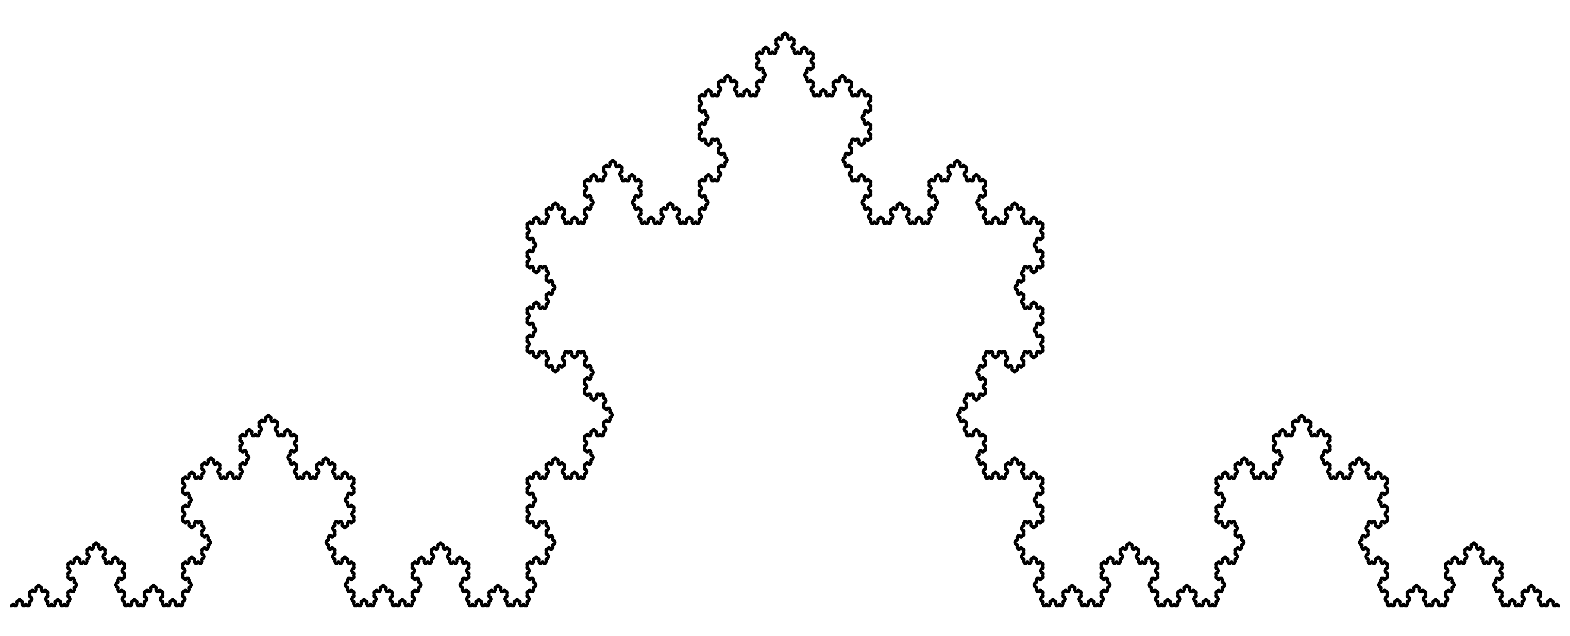

In [ ]:
%matplotlib inline
plt.figure(figsize=(20, 8))
plt.plot(kochcurve[0], kochcurve[1], 'k')
plt.xlim(0, 1)
plt.ylim(-0.01, 0.3)
plt.axis('off')

### Estimate fractal dimension by the Box counting method

Box counting is similar to finding the relationship between resolution and image size.

For simpliy 1d 

|![Self-similarity](https://miro.medium.com/v2/resize:fit:640/format:webp/1*UyDftj1kgVkr-rNud54_1g.png)|
|:--:| 
|*Fig 1.6.1 Image size and resolution*|


In [ ]:
# !wget https://github.com/AlexMa123/BIU-Computational-Physics-2022/blob/main/source/fractal_tools.pyc?raw=true -O fractal_tools.pyc

In [ ]:
import numpy as np

def fig_to_array(fig):
    """
    convert matplotlib figure object to numpy array.
    Input:
        fig: matplotlib figure object
    Return:
        numpy array, (height, width, rgba). rgba: red, green blue, alpha(Transparency)。
        (255, 255, 255) is white
    """
    import io
    io_buf = io.BytesIO()
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    fig.savefig(io_buf, format='raw')
    io_buf.seek(0)
    data = np.frombuffer(io_buf.getvalue(), dtype=np.uint8)
    data = data.reshape((int(fig.bbox.bounds[3]), int(fig.bbox.bounds[2]), -1))
    io_buf.close()
    return data[:, :, :3]

    
from fractal_tools import rescale, boxcount

ImportError: bad magic number in 'fractal_tools': b'B\r\r\n'

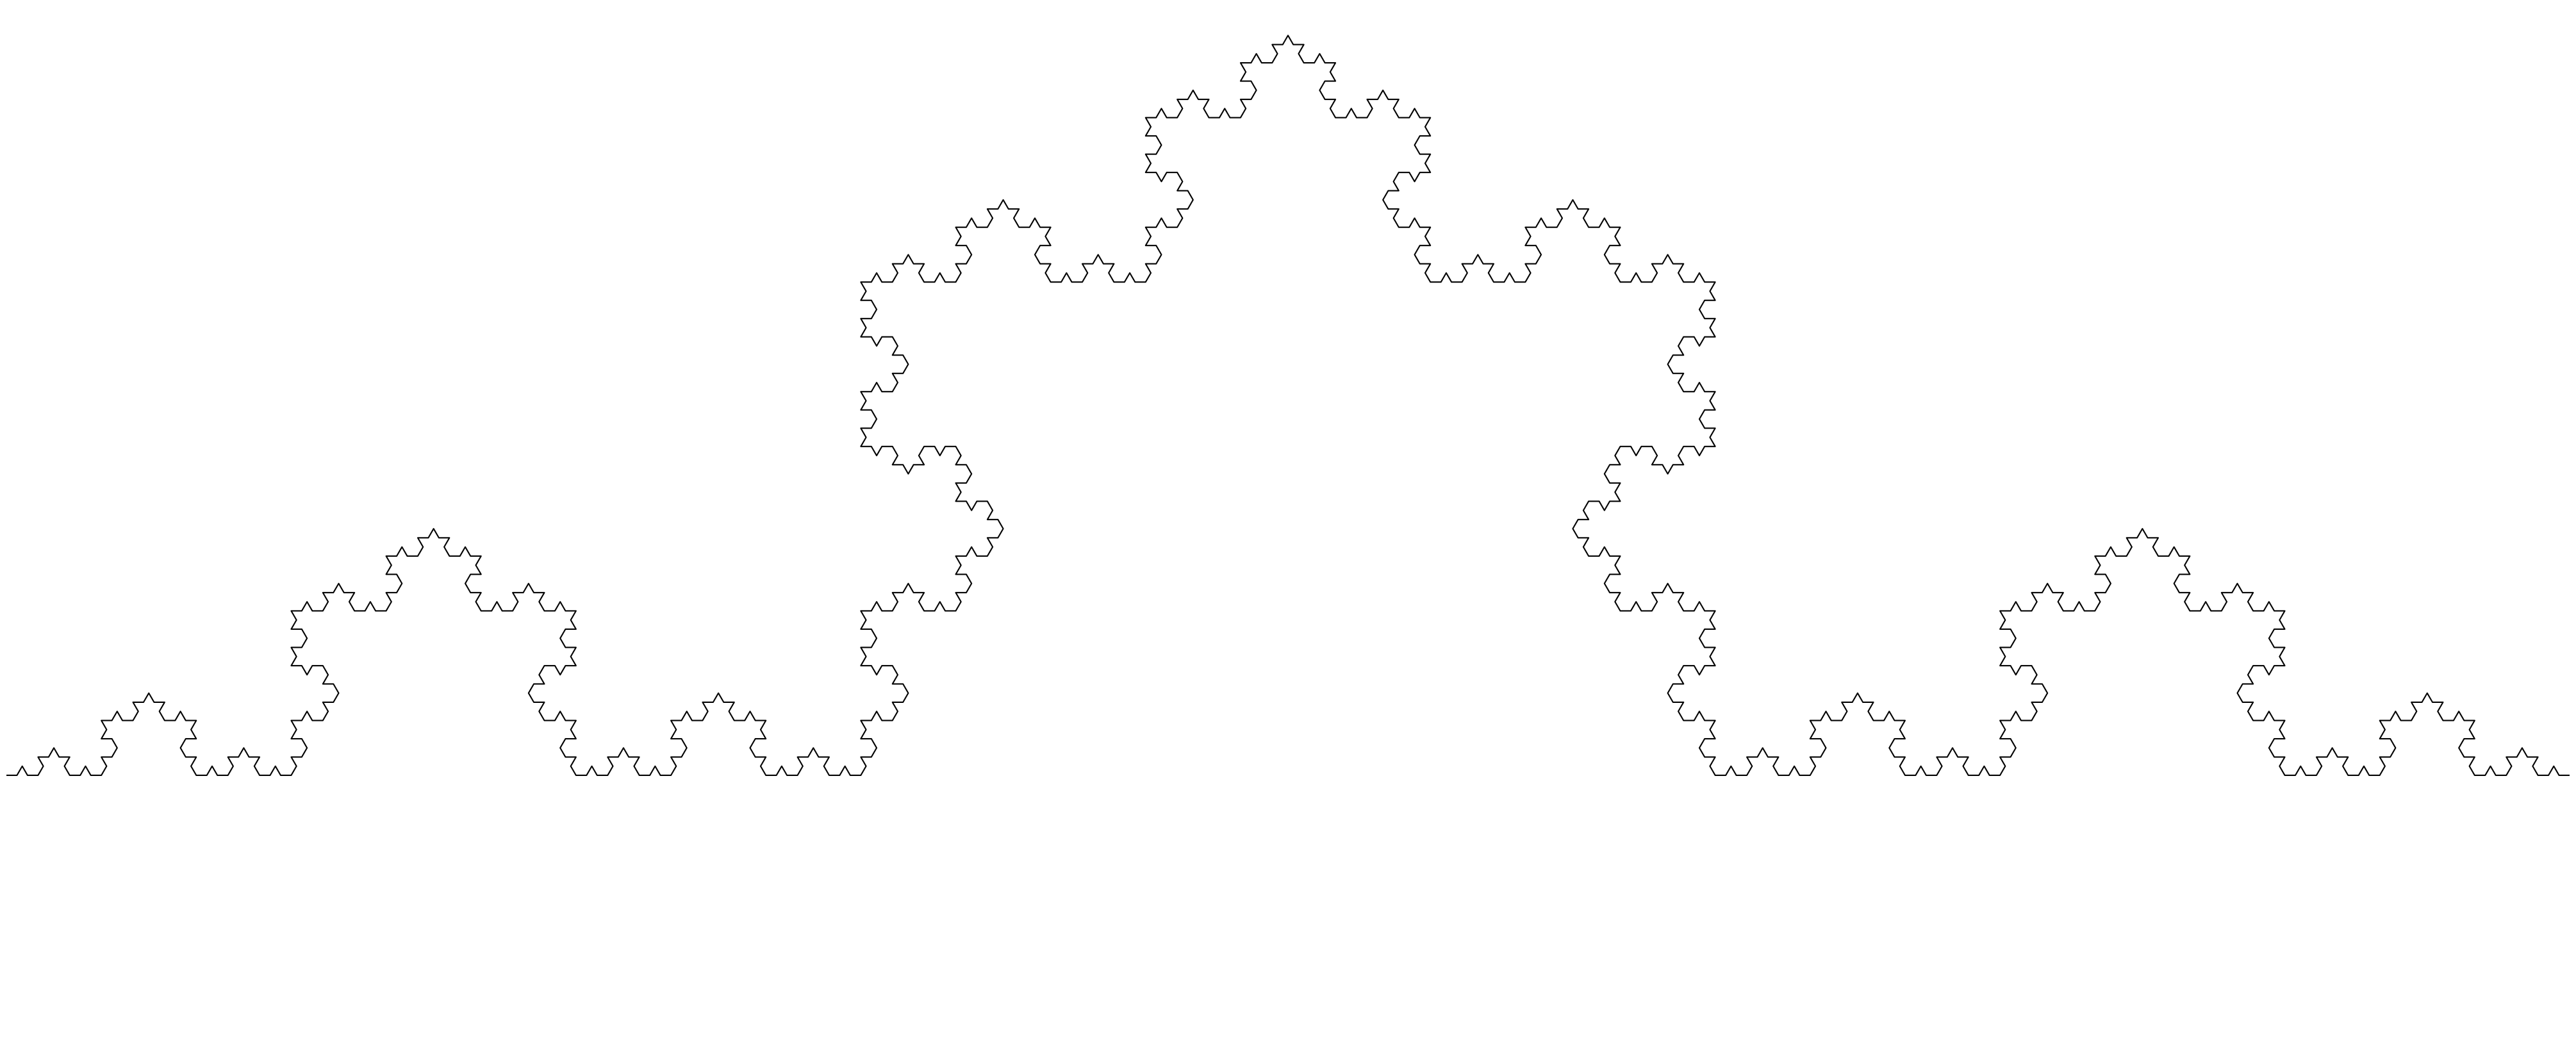

In [11]:
kochcurve = koch_curve(5)

fig = plt.figure(figsize=(40, 16))
plt.plot(kochcurve[0], kochcurve[1], 'k')
plt.xlim(0, 1)
plt.ylim(-0.1, 0.3)
plt.axis('off')

img_matrix = fig_to_array(fig)

In [12]:
((255 - np.mean(img_matrix, axis=-1)) / 255).sum()

34900.59215686273

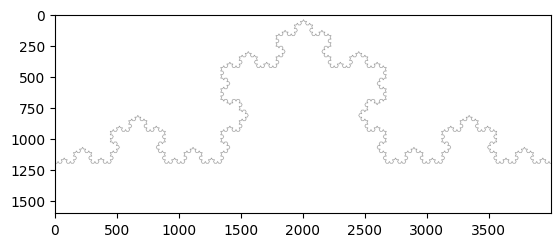

In [13]:
plt.imshow(img_matrix)

NameError: name 'rescale' is not defined

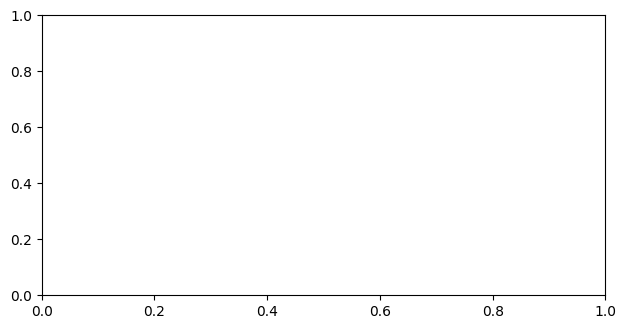

In [14]:
plt.figure(figsize=(16, 8))
plt.subplot(221)
plt.imshow(rescale(img_matrix, 1), cmap='Greys')
plt.title("box scale = 1")
plt.axis('off')

plt.subplot(222)
plt.imshow(rescale(img_matrix, 3), cmap='Greys')
plt.title("box scale = 3")
plt.axis('off')

plt.subplot(223)
plt.title("box scale = 9")
plt.imshow(rescale(img_matrix, 9), cmap='Greys')
plt.axis('off')

plt.subplot(224)
plt.title("box scale = 27")
plt.imshow(rescale(img_matrix, 27), cmap='Greys')
plt.axis('off')

In [15]:
scale = np.arange(3, 17, 1, dtype=int)
mass = np.zeros_like(scale)
for i, s in enumerate(scale):
    mass[i] = boxcount(img_matrix, s)

p = np.polyfit(np.log(scale), np.log(mass), 1)

NameError: name 'boxcount' is not defined

In [ ]:
plt.plot(scale, mass, '*')
plt.plot(scale, (np.exp(p[0] * np.log(scale) + p[1])), label=f'{p[0]:.3f} * x + {p[1]:.3f}')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('scale')
plt.ylabel('mass')
plt.title(f"fractal dimension is {-p[0]:.3f}")

In [ ]:
np.log(4) / np.log(3)

### One example of fractals in Chaos - The Logistic Map

A very nice video https://www.youtube.com/watch?v=ovJcsL7vyrk

The logistic map is described by the equation:
   $$x_{n+1} = r x_n (1-x_n)$$
  
and $x_n$ is between zero and one, $r$ is the growth factor (growth rate)

In [52]:
from numba import njit
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual

@njit
def logistic_map(r=3, x0=0.5, nstep=50):
    x = np.zeros(nstep)
    x[0] = x0
    for i in range(nstep-1):
        x[i + 1] = r * x[i] * (1 - x[i])
    return x

def plot_logistic(r, x0):
    plt.figure(figsize=(20, 5))
    plt.plot(logistic_map(r, x0, 100), 'o-')
    plt.ylim(0, 1)
    # plt.plot(logistic_map(r, x0 + 1e-4, 100), 'o-')

In [53]:
interactive(plot_logistic, r=widgets.FloatSlider(
    value=3.3, min=0.5, max=3.99, step=0.01
), x0=widgets.FloatSlider(
    value=0.501, min=0.01, max=1, step=0.01
))

interactive(children=(FloatSlider(value=3.3, description='r', max=3.99, min=0.5, step=0.01), FloatSlider(value…

#### visualize bifuecation

In [54]:
def bifurcation(r_array, x0=0.5, nstart=10000, nmax=10256):
    """
    calculate stable values for different r
    Input:
        r_array: array, r values
        x0: float
        nstart: int, wait nstart steps before recording
        nmax: int, number of step to iterate.
    Return:
        List of array, length of the list will be the same with the length of r_array
    """
    b = []
    for r in r_array:
        x = logistic_map(r, x0, nmax)
        x = np.round(x[nstart:], 8) # round an array to the given number of decimals.
        b.append(np.unique(x)) # Returns the sorted unique elements of an array. 
    return b        

In [55]:
np.unique([0,0,0,2,2,2])

array([0, 2])

In [56]:
r_array = np.arange(0.5, 3.99, 0.001)
b = bifurcation(r_array)

In [57]:
points = []
for i, r in enumerate(r_array):
    for be in b[i]:
        points.append((r, be))
points = np.array(points)
points.shape

(101623, 2)

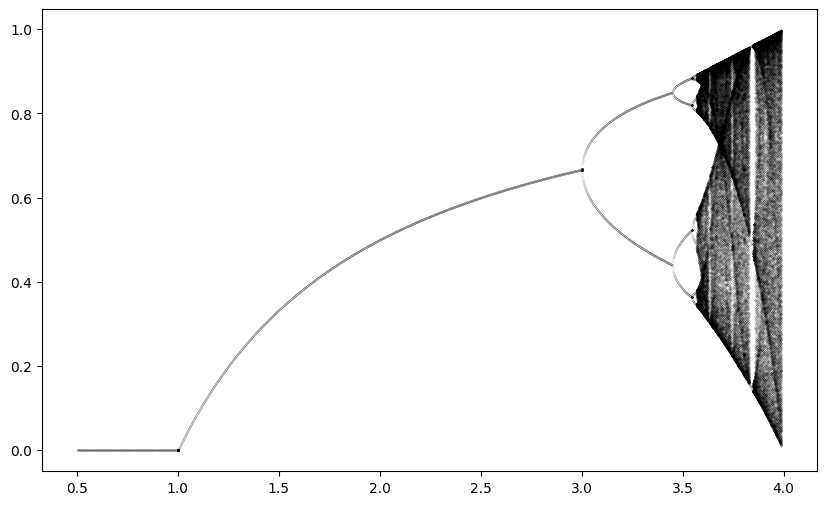

In [58]:
# %matplotlib inline
fig1 = plt.figure(figsize=(10,  6))

plt.plot(points[:, 0], points[:, 1], 'k.', markersize=0.1)
# plt.xlim(3.8, 3.9)

From the bifurcation diagram,  we can find period-doubling bifurcation

![logistic map zoom in](https://juliadynamics.github.io/JuliaDynamics/videos/interact/interactive_chaos_logo.gif)


### Mandelbort set

If we let $z = r (\frac{1}{2} - x)$, $c = \frac{r}{2} (1 - \frac{r}{2})$, the logistic map will be transformed to:
$$z_{n+1} = z_n ^ 2 + c$$

Now let's consider z is a complex number. The Mandelbrot set is the set of complex numbers c for which $z_n$ doesn't diverge to infinity when $z_0 = 0$

In [ ]:
@njit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    Input:
        x: float
        y: float
        max_iters: int
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z * z + c
        if (z.real * z.real + z.imag * z.imag) >= 10:
            return i

    return 0

@njit
def create_fractal(x, y, iters):
    """
    Input:
        x: 2d array
        y: 2d array
        iters: int
    """
    color = np.zeros_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            real = x[i, j]
            imag = y[i, j]
            color[i, j] = mandel(real, imag, iters)
           
    return color

x = np.arange(-2, 1, 0.001) ## real part
y = np.arange(-1.5, 1.5, 0.001) ## imag part
x, y = np.meshgrid(x, y)


image = create_fractal(x, y, 100)

plt.figure(figsize=(12, 12))
plt.imshow(image, extent=[-2, 1, -1.5, 1.5])
plt.show()

Figure from wikipedia, logistic map with mandelbort set

![Mandelbort set with logistic](https://www.researchgate.net/profile/Tssachin-Venkatesh/publication/343986739/figure/fig1/AS:930432354897922@1598843768697/The-real-line-on-the-mandelbrot-set-lines-up-with-the-bifurcations-in-the-logistic-map-1.jpg)


# Exercises

1. Work with chatgpt on an application of fractals in a given field of your choice. Summarize in your own words (3 to 4 sentences) what you have learned from chatgpt and evaluate whether it is correct or not.


One interesting field where fractals find applications is computer graphics and visual effects. Fractals are mathematical objects that exhibit self-similarity at different scales, and their intricate patterns can be used to create visually stunning and realistic graphics.

In computer graphics, fractals are used to generate complex and detailed natural phenomena such as mountains, clouds, and landscapes. By applying fractal algorithms, graphics artists and designers can create realistic and visually appealing scenes that mimic the intricate patterns found in nature.

One popular application of fractals in computer graphics is the generation of realistic terrain and landscapes. Fractal algorithms, such as the Diamond-Square algorithm or the Perlin noise algorithm, can be employed to create detailed and diverse terrains with realistic features like mountains, valleys, and rivers. Fractal-based terrain generation allows for the creation of vast and visually engaging virtual worlds in video games, simulations, and movies.

Fractals are also used in the creation of natural phenomena like clouds and foliage. By applying fractal algorithms to simulate the shape and structure of clouds, computer graphics artists can generate realistic cloud formations that add depth and realism to virtual environments. Similarly, fractal-based algorithms can be used to model the intricate shapes of trees and plants, resulting in visually convincing foliage for virtual landscapes.

Another application of fractals in computer graphics is in the creation of fractal-based textures. Fractal patterns can be used to generate textures with intricate and repetitive structures, which can be applied to objects and surfaces in virtual scenes. Fractal-based textures are particularly useful for creating realistic and visually interesting surfaces, such as rock formations, marble, or wood.

In summary, the field of computer graphics and visual effects benefits greatly from the application of fractals. Fractals provide a powerful tool for generating realistic and visually stunning graphics, allowing for the creation of intricate natural phenomena, terrains, clouds, foliage, and textures. By harnessing the beauty and complexity of fractal patterns, computer graphics artists can enhance the realism and visual appeal of virtual environments in various media.

Summery in my own words:
Fractals find applications in computer graphics and visual effects. They are used to generate realistic terrains, landscapes, clouds, and foliage by employing fractal algorithms. Fractals add depth and realism to virtual environments by mimicking the intricate patterns found in nature. They also create visually stunning textures, such as rock formations or wood, enhancing the overall visual appeal of computer-generated graphics.

2. Implement the Box Counting Method and use it to calculate the fractal dimension of the Koch curve numerically. Compare to the analytic result.

In [29]:
import numpy as np

def myrescale(img_matrix, k):
    """
    Rescale a image
    """
    # Rescale the image matrix
    img_matrix = 255 - img_matrix
    img_matrix = np.mean(img_matrix, axis=-1)

    # Rescale the image matrix by k
    img_rescaled = img_matrix[::k, ::k]

    return img_rescaled


def myboxcount(img_matrix, k):
    """
    Rescale img_matrix by k and count how many occupied sites.
    Input:
        img_matrix: 3d array (height, width, rgb)
        k: int

    Return:
        int
    """
    # Rescale the image matrix
    img_rescaled = myrescale(img_matrix, k)

    # Count the number of occupied sites (non-zero elements)
    count = np.count_nonzero(img_rescaled)

    return count


(-0.5, 148.5, 59.5, -0.5)

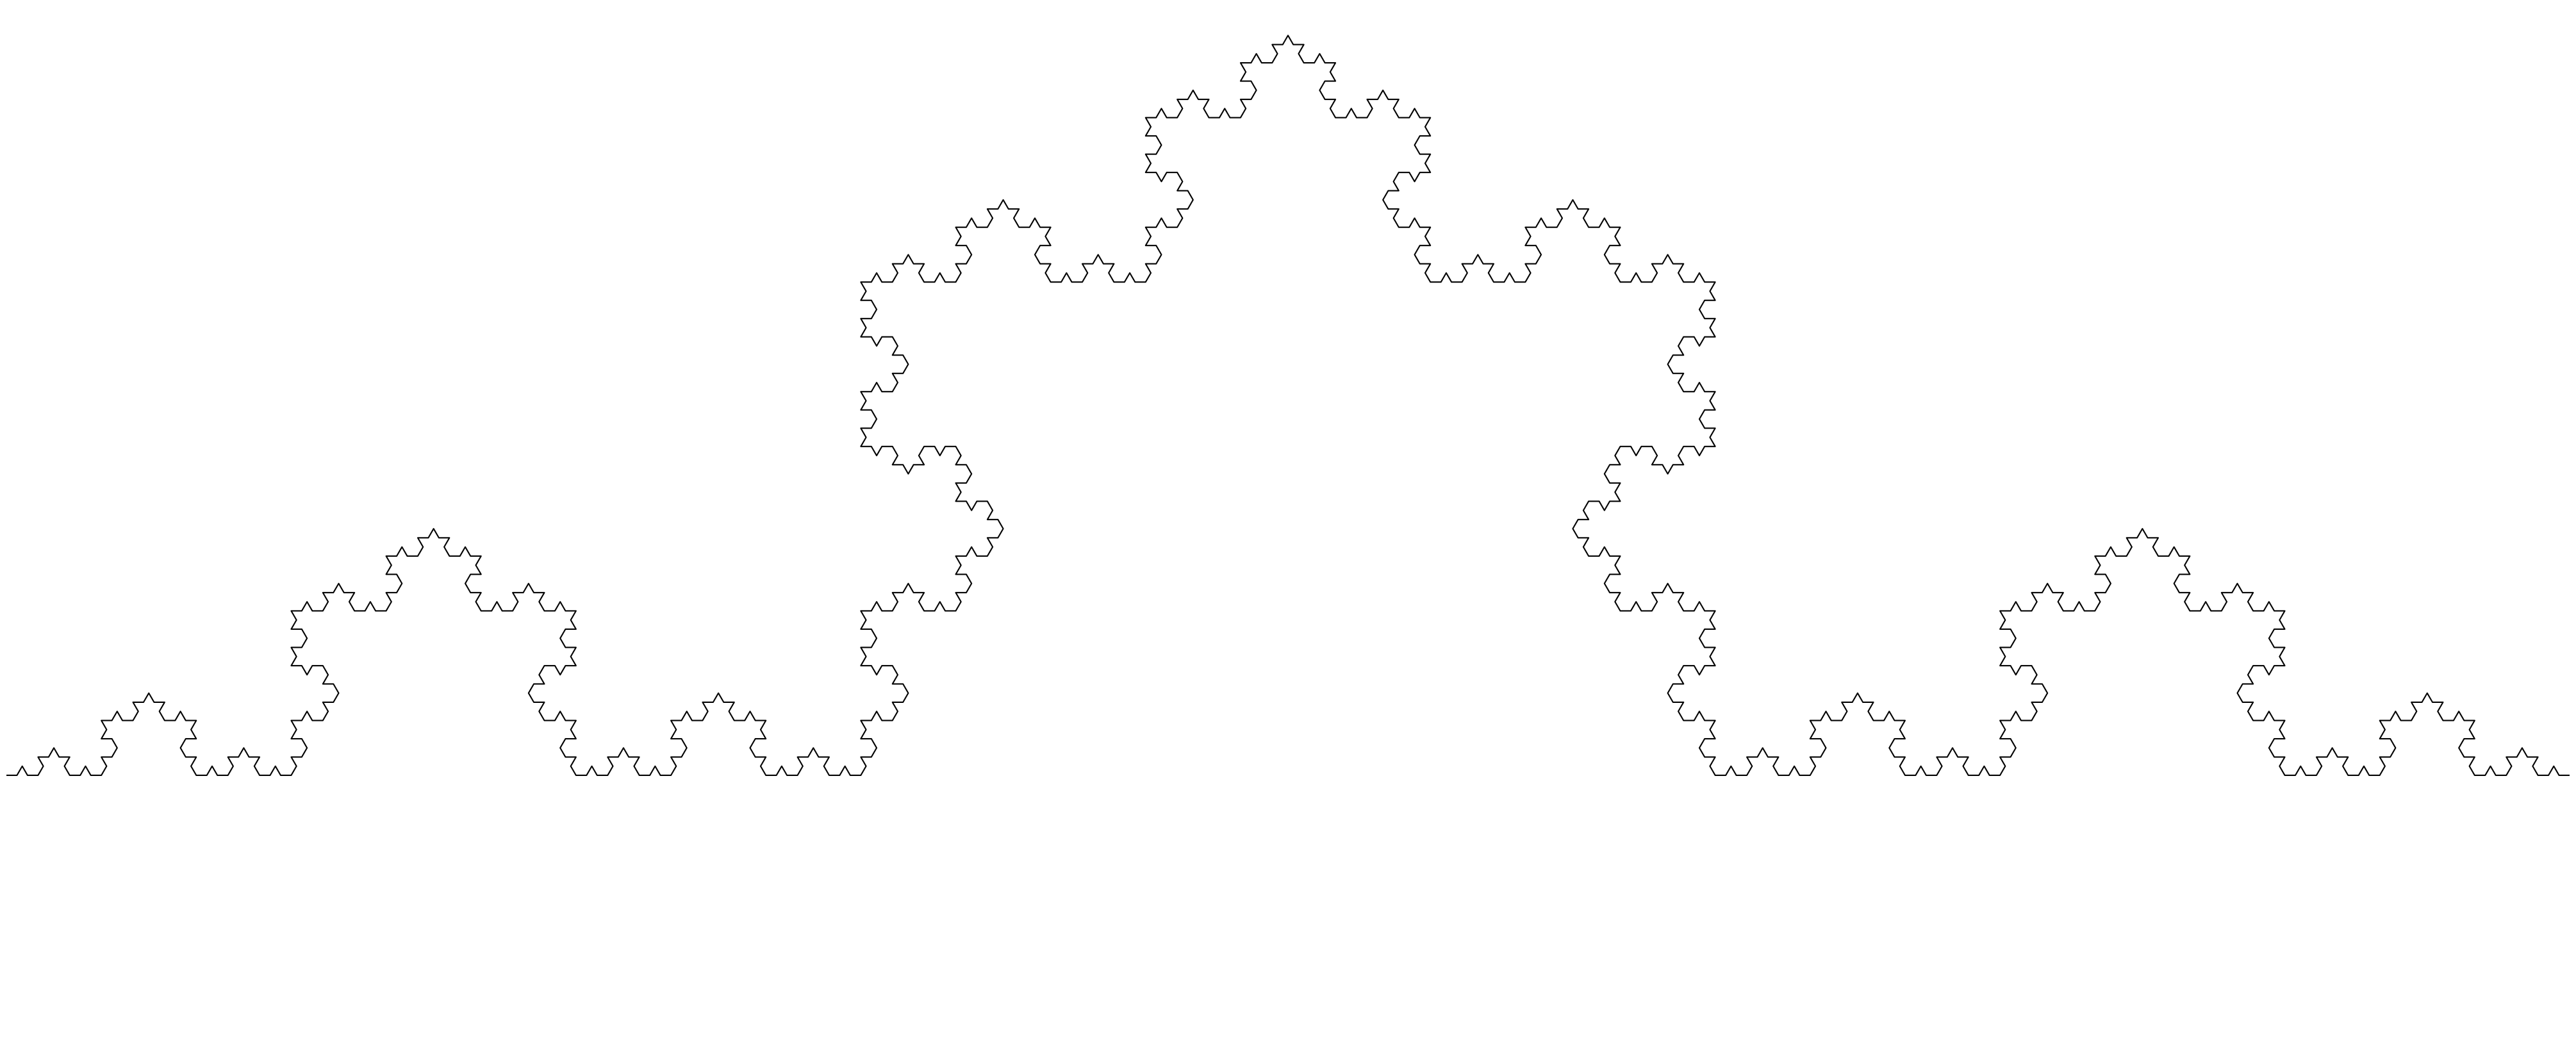

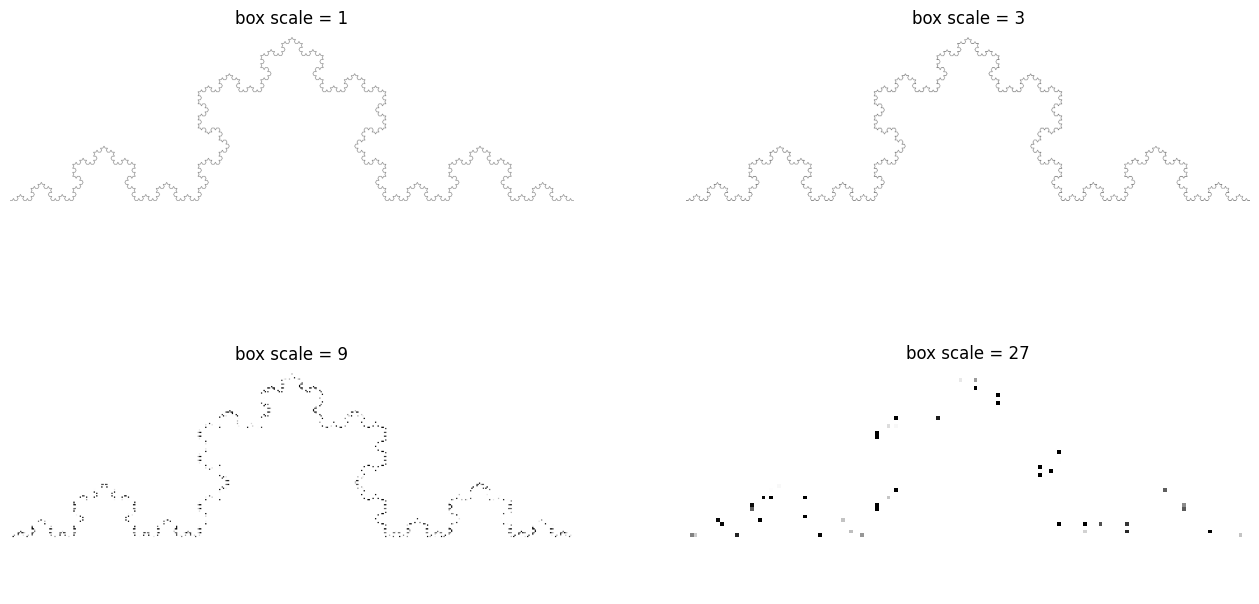

In [30]:
# Do not need to modify the codes here, only for testing your code

kochcurve = koch_curve(5)
fig = plt.figure(figsize=(40, 16))
plt.plot(kochcurve[0], kochcurve[1], 'k')
plt.xlim(0, 1)
plt.ylim(-0.1, 0.3)
plt.axis('off')
img_matrix = fig_to_array(fig)

plt.figure(figsize=(16, 8))
plt.subplot(221)
plt.imshow(myrescale(img_matrix, 1), cmap='Greys')
plt.title("box scale = 1")
plt.axis('off')

plt.subplot(222)
plt.imshow(myrescale(img_matrix, 3), cmap='Greys')
plt.title("box scale = 3")
plt.axis('off')

plt.subplot(223)
plt.title("box scale = 9")
plt.imshow(myrescale(img_matrix, 9), cmap='Greys')
plt.axis('off')

plt.subplot(224)
plt.title("box scale = 27")
plt.imshow(myrescale(img_matrix, 27), cmap='Greys')
plt.axis('off')

In [34]:
# Do not need to modify the codes here, only for testing your code

scale = np.arange(3, 17, 1, dtype=int)
mass = np.zeros_like(scale)
for i, s in enumerate(scale):
    mass[i] = myboxcount(img_matrix, s)

p = np.polyfit(np.log(scale), np.log(mass), 1)

Text(0.5, 1.0, 'fractal dimension is 1.997')

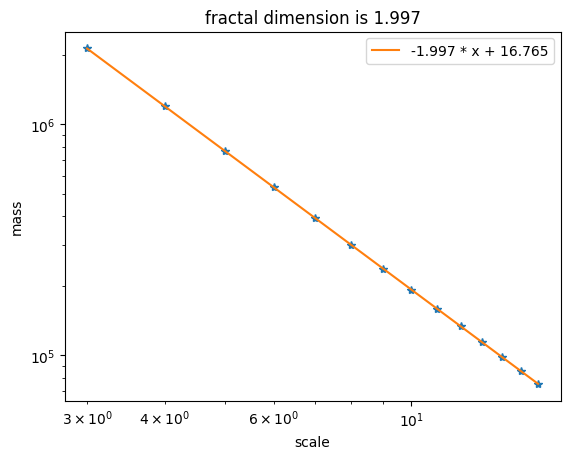

In [33]:
# Do not need to modify the codes here, only for testing your code

plt.plot(scale, mass, '*')
plt.plot(scale, (np.exp(p[0] * np.log(scale) + p[1])), label=f'{p[0]:.3f} * x + {p[1]:.3f}')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('scale')
plt.ylabel('mass')
plt.title(f"fractal dimension is {-p[0]:.3f}")

3. Chaos game
In mathematics, the term chaos game originally referred to a method of creating a fractal, using a polygon and an initial point selected at random inside it.

***Sierpinski triangle***

Step 1: choose three points: A(0, 0), B(1, 0), C (1, 1)

Step 2: randomly choose a points P0

Step 3: randomly select one point from (A, B, C), move the point from P0 to P1, where P1 is the middle point between P0 and the selected points. (np.random.randint(n) to generate a random integer from 0 to n (n is not included))


Step 4: repeat Step 2 and Step 3 to get P2 based on P1 and (A, B, C)

...
repeat it 100000 times and plot the points on the figure

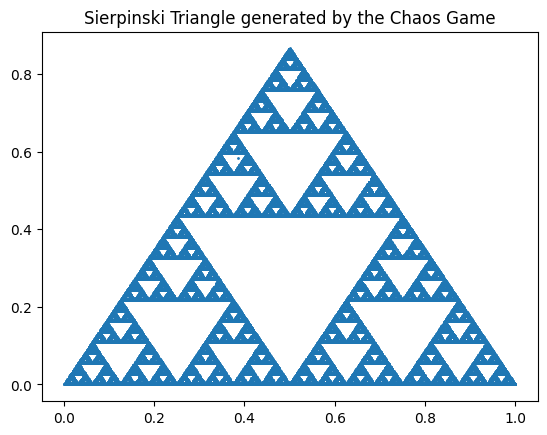

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the vertices of the triangle
vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])

# Step 2: Initialize a random point P0 inside the triangle
P0 = np.array([np.random.rand(), np.random.rand()])

# Initialize an array to store the points generated by the Chaos Game
points = []

# Repeat the process 100000 times
for _ in range(100000):
    # Step 3: Randomly select a vertex of the triangle
    vertex = vertices[np.random.randint(3)]

    # Calculate the midpoint between P0 and the selected vertex
    P1 = (P0 + vertex) / 2

    # Add P1 to the list of points
    points.append(P1)

    # Update P0 for the next iteration
    P0 = P1

# Convert the list of points to a numpy array for plotting
points = np.array(points)

# Plot the points generated by the Chaos Game
plt.scatter(points[:, 0], points[:, 1], s=1)
plt.title("Sierpinski Triangle generated by the Chaos Game")
plt.show()


***Barnsley's fern***

The game that generate Barnsley's fern is to choose four affine transformations randomly.

The four transformations are:


$$f_{1}(x,y)={\begin{bmatrix}\ 0.00&\ 0.00\ \\0.00&\ 0.16\end{bmatrix}}{\begin{bmatrix}\ x\\y\end{bmatrix}}$$

$$ f_{2}(x,y)={\begin{bmatrix}\ 0.85&\ 0.04\ \\-0.04&\ 0.85\end{bmatrix}}{\begin{bmatrix}\ x\\y\end{bmatrix}}+{\begin{bmatrix}\ 0.00\\1.60\end{bmatrix}}$$


$$ f_{3}(x,y)={\begin{bmatrix}\ 0.20&\ -0.26\ \\0.23&\ 0.22\end{bmatrix}}{\begin{bmatrix}\ x\\y\end{bmatrix}}+{\begin{bmatrix}\ 0.00\\1.60\end{bmatrix}}$$


$$ f_{4}(x,y)={\begin{bmatrix}\ -0.15&\ 0.28\ \\0.26&\ 0.24\end{bmatrix}}{\begin{bmatrix}\ x\\y\end{bmatrix}}+{\begin{bmatrix}\ 0.00\\0.44\end{bmatrix}}$$


Step1: set P0 = (0, 0)

Step2: choose an affine transformation f from the four transformations

Step3: P1 = f(P0)

repeat 100000 times

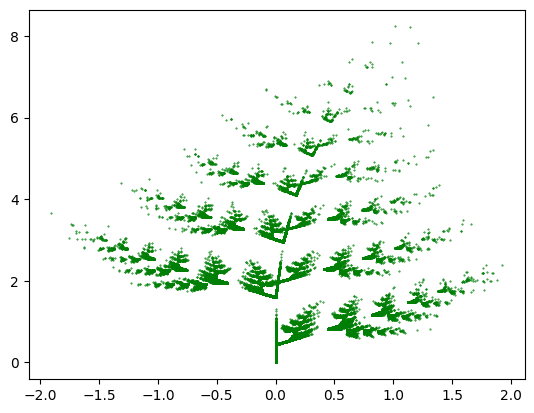

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the transformation functions
def f1(x, y):
    return np.array([[0.00, 0.00], [0.00, 0.16]]).dot(np.array([x, y]))

def f2(x, y):
    return np.array([[0.85, 0.04], [-0.04, 0.85]]).dot(np.array([x, y])) + np.array([0.00, 1.60])

def f3(x, y):
    return np.array([[0.20, -0.26], [0.23, 0.22]]).dot(np.array([x, y])) + np.array([0.00, 1.60])

def f4(x, y):
    return np.array([[-0.15, 0.28], [0.26, 0.24]]).dot(np.array([x, y])) + np.array([0.00, 0.44])

# List of transformation functions
transformations = [f1, f2, f3, f4]

# Initialize point P0
P0 = np.array([0, 0])

# Initialize lists to store x and y coordinates
x_coords = [P0[0]]
y_coords = [P0[1]]

# Perform the transformations 100000 times
for _ in range(100000):
    # Choose a random transformation function
    f = np.random.choice(transformations)

    # Apply the transformation to P0
    P1 = f(P0[0], P0[1])

    # Update P0
    P0 = P1

    # Store the new coordinates
    x_coords.append(P0[0])
    y_coords.append(P0[1])

# Plot the result
plt.scatter(x_coords, y_coords, s = 0.2, edgecolor ='green')
plt.show()


4. Calculate the Feigenbaum constant numerically using the Logistic Map.

![Dragon fractal](https://upload.wikimedia.org/wikipedia/commons/3/3e/Feigenbaum.png)

The Feigenbaum constant is defined as:
$$\delta = \lim_{i→∞ } \frac{L_{i}}{L_{i+1}}$$

Try to find the first three ratio (i=1, 2, 3), it should approch to Feigenbaum constant.

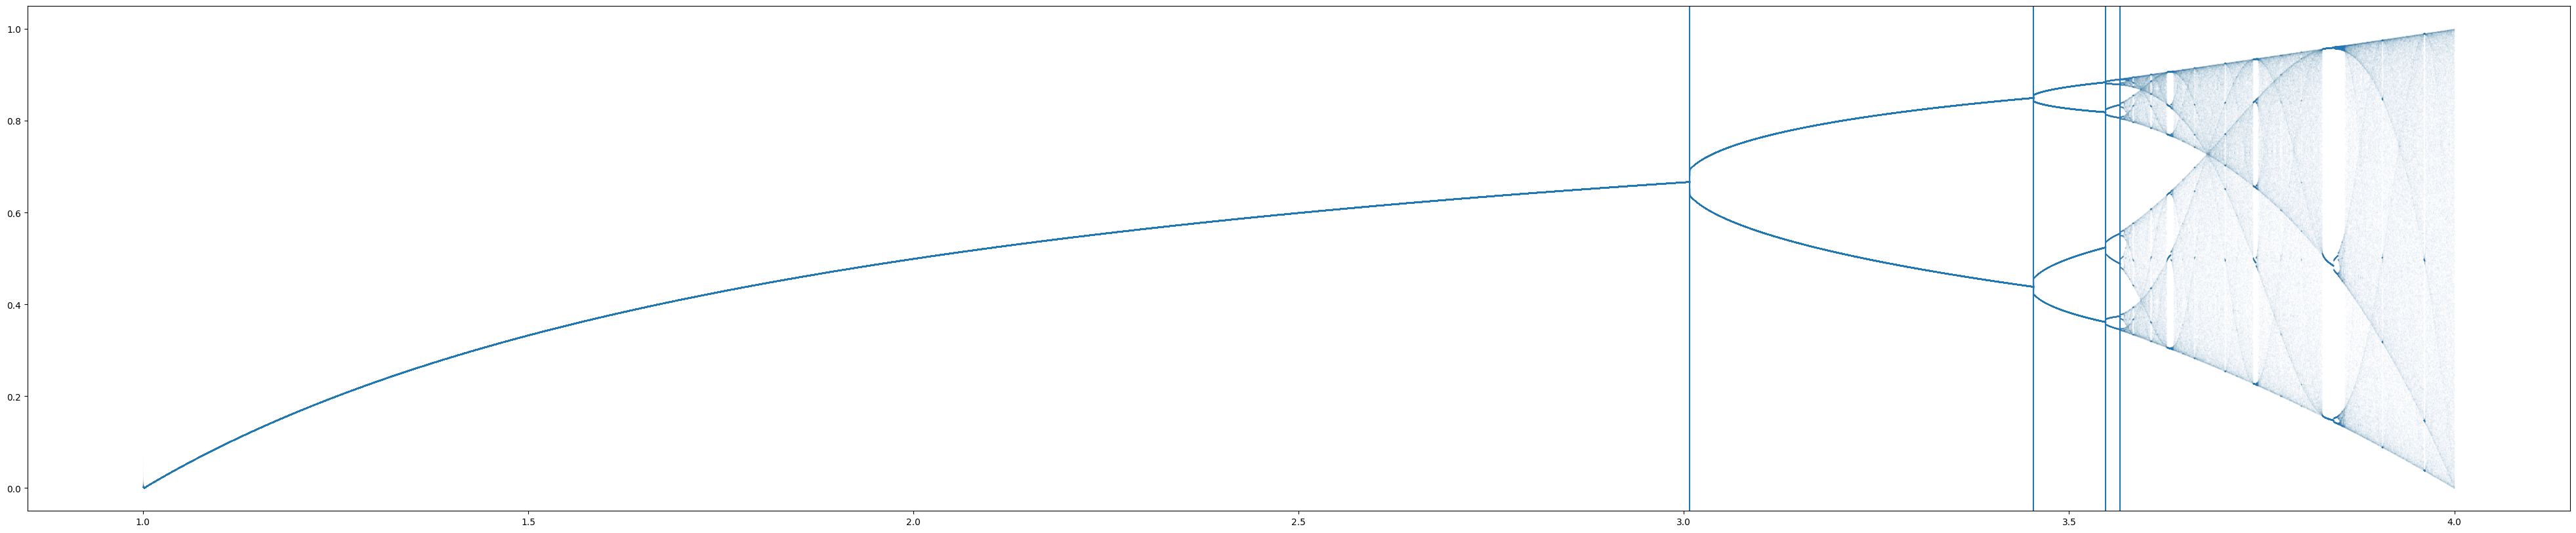

4.494006787978651 4.79869362497581 4.811931348221736


In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of steps and initialize X and Y arrays
steps = 3000000
X_values = np.linspace(1, 1 + steps * 0.000001, steps + 1)
Y_values = np.zeros(steps + 1)
Y_values[0] = 0.5

# Calculate Y_values using the given formula
for i in range(steps):
    Y_values[i+1] = Y_values[i] * X_values[i] * (1 - Y_values[i])

# Plot the values
plt.style.use('default')
plt.figure(figsize=(50, 10))
plt.plot(X_values, Y_values, '^', alpha=0.4, markersize=0.013)
plt.axis('on')

# Calculate the deltas
delta = 10 ** -3
R_values = np.zeros(4)
indices = [100, 2100000, 2470000, 2500000]
shifts = [1, 2, 4, 8]

for j in range(4):
    for i in range(indices[j], steps):
        if abs(Y_values[i+shifts[j]] - Y_values[i]) > delta:
            R_values[j] = X_values[i]
            break
    plt.axvline(x=R_values[j])

plt.show()
L0 = R_values[0] - 1
L1 = R_values[1] - R_values[0]
L2 = R_values[2] - R_values[1]
L3 = R_values[3] - R_values[2]
print(L0/L1, L1/L2, L2/L3)# Calculate and print the ratios
